In [18]:
import os
import numpy as np
from numpy.fft import fft2, ifft2
from scipy.signal import gaussian, convolve2d
import matplotlib.pyplot as plt
import cv2
from skimage.color import rgb2gray
from skimage import data
from skimage.filters import gaussian
from skimage.segmentation import active_contour

In [19]:
def blur(img, mode = 'box', kernel_size = 3):
    # mode = 'box' or 'gaussian' or 'motion'
    dummy = np.copy(img)
    if mode == 'box':
        h = np.ones((kernel_size, kernel_size)) / kernel_size ** 2
    elif mode == 'gaussian':
        h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
        h = np.dot(h, h.transpose())
        h /= np.sum(h)
    elif mode == 'motion':
        h = np.eye(kernel_size) / kernel_size
    dummy = convolve2d(dummy, h, mode = 'valid')
    return dummy

In [20]:
def add_gaussian_noise(img, sigma):
    gauss = np.random.normal(0, sigma, np.shape(img))
    noisy_img = img + gauss
    noisy_img[noisy_img < 0] = 0
    noisy_img[noisy_img > 255] = 255
    return noisy_img

In [21]:
def wiener_filter(img, kernel, K):
    kernel /= np.sum(kernel)
    dummy = np.copy(img)
    dummy = fft2(dummy)
    kernel = fft2(kernel, s = img.shape)
    kernel = np.conj(kernel) / (np.abs(kernel) ** 2 + K)
    dummy = dummy * kernel
    dummy = np.abs(ifft2(dummy))
    return dummy

In [22]:
def gaussian_kernel(kernel_size = 3):
    h = gaussian(kernel_size, kernel_size / 3).reshape(kernel_size, 1)
    h = np.dot(h, h.transpose())
    h /= np.sum(h)
    return h

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

In [23]:
file_name = os.path.join('lena.jpg') 
img = rgb2gray(plt.imread(file_name))

blurred_img = blur(img, mode = 'motion', kernel_size = 3)

noisy_img = add_gaussian_noise(blurred_img, sigma = 20)

kernel = gaussian_kernel(3)

filtered_img = wiener_filter(noisy_img, kernel, K = 30)

AttributeError: ignored

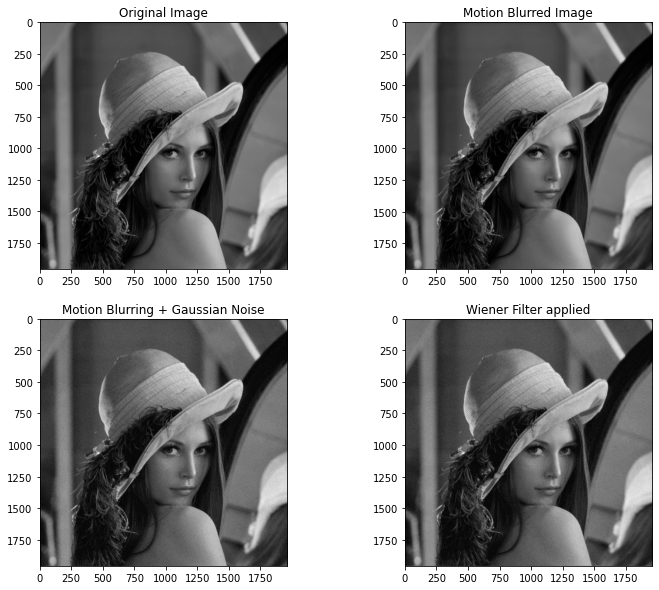

In [24]:
display = [img, blurred_img, noisy_img, filtered_img]
label = ['Original Image', 'Motion Blurred Image', 'Motion Blurring + Gaussian Noise', 'Wiener Filter applied']

fig = plt.figure(figsize=(12, 10))

for i in range(len(display)):
    fig.add_subplot(2, 2, i+1)
    plt.imshow(display[i], cmap = 'gray')
    plt.title(label[i])

plt.show()

In [25]:
#

#Huffman_Encoding_Decoding


In [26]:
import re
import numpy as np
from PIL import Image
print("Huffman Compression Program")
h = int(input("Enter 1 if you want to input an colour image file, 2 for default gray scale case:"))
if h == 1:
    file = input("Enter the filename:")
    my_string = np.asarray(Image.open(file),np.uint8)
    shape = my_string.shape
    a = my_string
    print ("Enetered string is:",my_string)
    my_string = str(my_string.tolist())
elif h == 2:
    array = np.arange(0, 737280, 1, np.uint8)
    my_string = np.reshape(array, (1024, 720))
    print ("Enetered string is:",my_string)
    a = my_string
    my_string = str(my_string.tolist())

else:
    print("You entered invalid input")                    # taking user input

letters = []
only_letters = []
for letter in my_string:
    if letter not in letters:
        frequency = my_string.count(letter)             #frequency of each letter repetition
        letters.append(frequency)
        letters.append(letter)
        only_letters.append(letter)

nodes = []
while len(letters) > 0:
    nodes.append(letters[0:2])
    letters = letters[2:]                               # sorting according to frequency
nodes.sort()
huffman_tree = []
huffman_tree.append(nodes)                             #Make each unique character as a leaf node

def combine_nodes(nodes):
    pos = 0
    newnode = []
    if len(nodes) > 1:
        nodes.sort()
        nodes[pos].append("1")                       # assigning values 1 and 0
        nodes[pos+1].append("0")
        combined_node1 = (nodes[pos] [0] + nodes[pos+1] [0])
        combined_node2 = (nodes[pos] [1] + nodes[pos+1] [1])  # combining the nodes to generate pathways
        newnode.append(combined_node1)
        newnode.append(combined_node2)
        newnodes=[]
        newnodes.append(newnode)
        newnodes = newnodes + nodes[2:]
        nodes = newnodes
        huffman_tree.append(nodes)
        combine_nodes(nodes)
    return huffman_tree                                     # huffman tree generation

newnodes = combine_nodes(nodes)

huffman_tree.sort(reverse = True)
print("Huffman tree with merged pathways:")

checklist = []
for level in huffman_tree:
    for node in level:
        if node not in checklist:
            checklist.append(node)
        else:
            level.remove(node)
count = 0
for level in huffman_tree:
    print("Level", count,":",level)             #print huffman tree
    count+=1
print()

letter_binary = []
if len(only_letters) == 1:
    lettercode = [only_letters[0], "0"]
    letter_binary.append(letter_code*len(my_string))
else:
    for letter in only_letters:
        code =""
        for node in checklist:
            if len (node)>2 and letter in node[1]:           #genrating binary code
                code = code + node[2]
        lettercode =[letter,code]
        letter_binary.append(lettercode)
print(letter_binary)
print("Binary code generated:")
for letter in letter_binary:
    print(letter[0], letter[1])

bitstring =""
for character in my_string:
    for item in letter_binary:
        if character in item:
            bitstring = bitstring + item[1]
binary ="0b"+bitstring
print("Your message as binary is:")
                                        # binary code generated

uncompressed_file_size = len(my_string)*7
compressed_file_size = len(binary)-2
print("Your original file size was", uncompressed_file_size,"bits. The compressed size is:",compressed_file_size)
print("This is a saving of ",uncompressed_file_size-compressed_file_size,"bits")
output = open("compressed.txt","w+")
print("Compressed file generated as compressed.txt")
output = open("compressed.txt","w+")
print("Decoding.......")
output.write(bitstring)

bitstring = str(binary[2:])
uncompressed_string =""
code =""
for digit in bitstring:
    code = code+digit
    pos=0                                        #iterating and decoding
    for letter in letter_binary:
        if code ==letter[1]:
            uncompressed_string=uncompressed_string+letter_binary[pos] [0]
            code=""
        pos+=1

print("Your UNCOMPRESSED data is:")
if h == 1:
    temp = re.findall(r'\d+', uncompressed_string)
    res = list(map(int, temp))
    res = np.array(res)
    res = res.astype(np.uint8)
    res = np.reshape(res, shape)
    print(res)
    print("Observe the shapes and input and output arrays are matching or not")
    print("Input image dimensions:",shape)
    print("Output image dimensions:",res.shape)
    data = Image.fromarray(res)
    data.save('uncompressed.png')
    if a.all() == res.all():
        print("Success")
if h == 2:
    temp = re.findall(r'\d+', uncompressed_string)
    res = list(map(int, temp))
    print(res)
    res = np.array(res)
    res = res.astype(np.uint8)
    res = np.reshape(res, (1024, 720))
    print(res)
    data = Image.fromarray(res)
    data.save('uncompressed.png')
    print("Success")

Huffman Compression Program
Enter 1 if you want to input an colour image file, 2 for default gray scale case:1
Enter the filename:new.jpg
Enetered string is: [[[180 189 218]
  [180 189 218]
  [180 189 218]
  ...
  [241 247 255]
  [241 247 255]
  [241 247 255]]

 [[177 186 215]
  [177 186 215]
  [177 186 215]
  ...
  [235 241 253]
  [235 241 253]
  [235 241 253]]

 [[179 188 217]
  [179 188 217]
  [179 188 217]
  ...
  [228 234 246]
  [228 234 246]
  [228 234 246]]

 ...

 [[  5  48  91]
  [  6  49  92]
  [  8  51  94]
  ...
  [  5  31  88]
  [  5  31  88]
  [  5  31  88]]

 [[  3  44  88]
  [  4  45  89]
  [  5  46  90]
  ...
  [  5  31  88]
  [  5  31  88]
  [  5  31  88]]

 [[  4  42  87]
  [  5  43  88]
  [  3  44  88]
  ...
  [  5  31  88]
  [  5  31  88]
  [  5  31  88]]]
Huffman tree with merged pathways:
Level 0 : [[319244, ' ,67[]09584321']]
Level 1 : [[123748, ' ,', '1'], [195496, '67[]09584321', '0']]
Level 2 : [[85706, '67[]09', '1'], [109790, '584321', '0']]
Level 3 : [[618

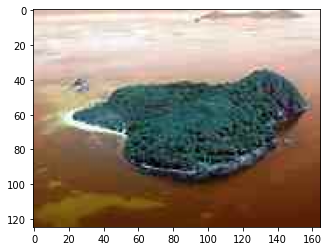

In [27]:
new = cv2.imread("new.jpg")
uncompressed = cv2.imread("uncompressed.png")
plt.imshow(new)

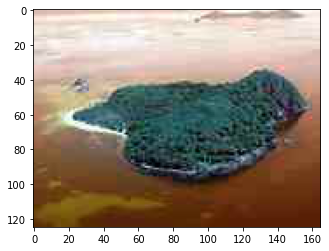

In [28]:
plt.imshow(uncompressed)
plt.show()

#Image Segmentation

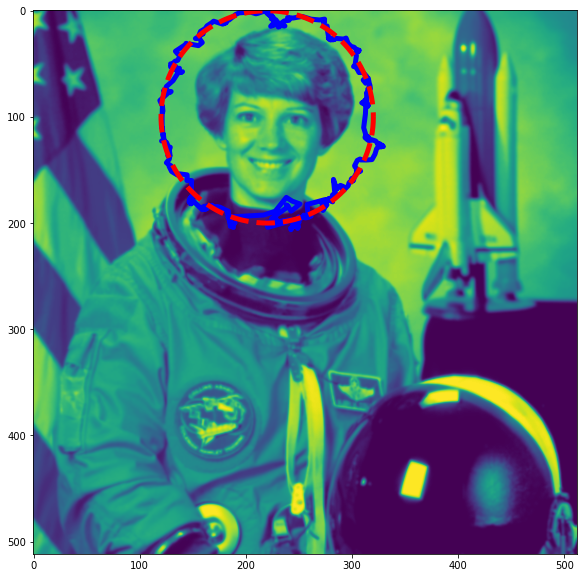

In [30]:
from skimage import data

# Sample Image of scikit-image package
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

# Applying Gaussian Filter to remove noise
gray_astronaut_noiseless = gaussian(gray_astronaut, 1)

# Localising the circle's center at 220, 110
x1 = 220 + 100*np.cos(np.linspace(0, 2*np.pi, 500))
x2 = 100 + 100*np.sin(np.linspace(0, 2*np.pi, 500))

# Generating a circle based on x1, x2
snake = np.array([x1, x2]).T

# Computing the Active Contour for the given image
astronaut_snake = active_contour(gray_astronaut_noiseless,
								snake)

fig = plt.figure(figsize=(10, 10))

# Adding subplots to display the markers
ax = fig.add_subplot(111)

# Plotting sample image
ax.imshow(gray_astronaut_noiseless)

# Plotting the face boundary marker
ax.plot(astronaut_snake[:, 0],
		astronaut_snake[:, 1],
		'-b', lw=5)

# Plotting the circle around face
ax.plot(snake[:, 0], snake[:, 1], '--r', lw=5)
